# Lead Dataset
who will pay for the course?

The included data file contains details about “leads”, where a lead is a person who wants to take up a course with “SomeSchool”, a college. Every row contains information about one lead. Those leads with “Closed” in the Lead Stage column are the people who have actually paid for the course.

The purpose of the exercise is to determine which leads are more likely to close. A score should be assigned to each lead, with the possible values of “High”, “Medium” and “Low”, where “High” means that the lead is most likely to pay, and “Low” means least likely.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 1000
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
data = pd.read_csv(r'C:\Users\pc\Downloads\SampleData.csv', encoding='cp1252')

In [3]:
data.head()

,Prospect ID,Lead Number,Company,Lead Origin,Mobile Number,Website,Time Zone,Job Title,Lead Source,Source Medium,Notes,Source Campaign,Source Content,Do Not Email,Do Not Call,Lead Stage,Lead Grade,Lead Score,Order Value,Engagement Score,TotalVisits,Page Views Per Visit,Average Time Per Visit,Last Activity,Last Activity Date,Related Landing Page Id,First Landing Page Submission Id,First Landing Page Submission Date,Created On,Modified On,Lead Conversion Date,Address 1,Address 2,Cityold,State,Country,Zip,Facebook URL,Twitter URL,LinkedIn URL,Industry,Work Area,Course Interested,Keyword,Date,Specialization,Entrance Test,How did you hear about SomeSchool,What is your current occupation,If you are a working professional,If you are a working professional please mention,What matters most to you in choosing an ADP,Age,Next Follow Up,Search,Magazine,Newspaper Article,Welearn Forums,Newspaper,Digital Advertisement,Through Recommendations,Any other Please specify,Last Degree,Receive More Updates About Our Courses,Admission Number,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on PGDMHBSCM,Chat Group,Lead Profile,City New,Country New,Industry New,Profile Score,Asymmetrique Activity Index,Asymmetrique Profile Index,ecode,amt,eventname,Enquiry Type,Asymmetrique Activity Score,Asymmetrique Profile Score,Admission Date,I agree to pay the amount through cheque,Previous Stage,Number of Followup Calls,Asym how soon you can join program,Asymm Reason to take admission,Asymm Are you aware about SomeSchool College,Asymm Are you applying for any other form of MBA,Asym What is your expectation from this course,Asym How do you feel about taking admission,Asym What stopping you from joining course,Asym What are your concerns for taking admission,Asym preferences for selecting management course,a free copy of Mastering The Interview,What attracted you to consider SomeSchool,you to consider SomeSchool,Landing Page,Admission Constraints,Lead Type,Asymmetrique Scoring Model,Last Notable Activity,Last Notable Activity Date,Source Referrer,Last Visit Date,Photo Url,Stage Rotting Flag Status,Stage Rotting Flag Message,Stage Rotting Flag Modification Date,Stage Rotting Flag Additional Info,Stage Rotting Flag Level,Mailing Preferences,Twitter Id,Facebook Id,LinkedIn Id,Skype Id,Gtalk Id,Google Plus Id,Quality Score 01,Groups
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,NaN,API,NaN,NaN,NaN,NaN,Olark Chat,NaN,NaN,NaN,NaN,No,No,Not Interested,NaN,105,NaN,0,0.0,0.0,0.00,Page Visited on Website,31-07-2016 17:16,NaN,NaN,NaN,31-07-2016 17:11,03-08-2016 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Select Specialization,MAT,Select,Unemployed,Accounting/Finance,Select,Better Career Prospects,Select,NaN,No,No,No,No,No,No,No,NaN,NaN,No,NaN,Interested in other courses,Low in Relevance,No,No,NaN,Select,Select,India,Consumer Durables,NaN,02.Medium,02.Medium,NaN,NaN,NaN,NaN,15.0,15.0,NaN,No,Select,Select,Select,Select,Select,Select,Select,Select,Select,Select,Select,No,NaN,Select,NaN,NaN,NaN,2.0,Modified,03-08-2016 12:00,NaN,31-07-2016 17:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,NaN,API,NaN,NaN,NaN,NaN,Organic Search,NaN,NaN,NaN,NaN,No,No,Unreachable,NaN,120,NaN,0,5.0,2.5,83.75,Email Opened,08-08-2016 13:11,NaN,NaN,NaN,31-07-2016 17:00,01-08-2016 12:45,31-07-2016 17:02,NaN,NaN,Mumbai,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Select Specialization,MAT,Select,Unemployed,Accounting/Finance,Select,Better Career Prospects,Select,NaN,No,No,No,No,No,No,No,NaN,NaN,No,NaN,Ringing,NaN,No,No,Leads Support,Select,Select,India,Consumer Durables,NaN,02.Medium,02.Medium,NaN,NaN,NaN,NaN,15.0,15.0,NaN,No,Select,Select,Select,Select,Select,Select,Select,Select,Select,Select,Select,No,NaN,Select,NaN,NaN,NaN,2.0,Email Opened,08-08-2016 13:11,NaN,08-08-2016 13:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,NaN,Landing Page Submi

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 122 entries, Prospect ID to Groups
dtypes: float64(34), int64(3), object(85)
memory usage: 8.6+ MB


In [6]:
x = data.isnull().sum()/data.isnull().count()*100
# dict(x.sort_values(ascending=False))
drop_cols = x[x>85.9].sort_values(ascending=False).index.tolist()

In [7]:
data.drop(drop_cols, axis=1, inplace=True)

In [8]:
cat_data = data.select_dtypes('O')
cat_data.head(1)

,Prospect ID,Lead Origin,Lead Source,Source Medium,Notes,Source Campaign,Source Content,Do Not Email,Do Not Call,Lead Stage,Lead Grade,Last Activity,Last Activity Date,Related Landing Page Id,First Landing Page Submission Id,First Landing Page Submission Date,Created On,Modified On,Lead Conversion Date,Cityold,State,Country,Specialization,Entrance Test,How did you hear about SomeSchool,What is your current occupation,If you are a working professional,If you are a working professional please mention,What matters most to you in choosing an ADP,Age,Search,Magazine,Newspaper Article,Welearn Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on PGDMHBSCM,Chat Group,Lead Profile,City New,Country New,Industry New,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,Previous Stage,Number of Followup Calls,Asym how soon you can join program,Asymm Reason to take admission,Asymm Are you aware about SomeSchool College,Asymm Are you applying for any other form of MBA,Asym What is your expectation from this course,Asym How do you feel about taking admission,Asym What stopping you from joining course,Asym What are your concerns for taking admission,Asym preferences for selecting management course,a free copy of Mastering The Interview,you to consider SomeSchool,Last Notable Activity,Last Notable Activity Date,Last Visit Date
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,NaN,NaN,NaN,NaN,No,No,Not Interested,NaN,Page Visited on Website,31-07-2016 17:16,NaN,NaN,NaN,31-07-2016 17:11,03-08-2016 12:00,NaN,NaN,NaN,NaN,Select Specialization,MAT,Select,Unemployed,Accounting/Finance,Select,Better Career Prospects,Select,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,Select,Select,India,Consumer Durables,02.Medium,02.Medium,No,Select,Select,Select,Select,Select,Select,Select,Select,Select,Select,Select,No,Select,Modified,03-08-2016 12:00,31-07-2016 17:16


count          9240
unique            9
top       Qualified
freq           2960
Name: Lead Stage, dtype: object


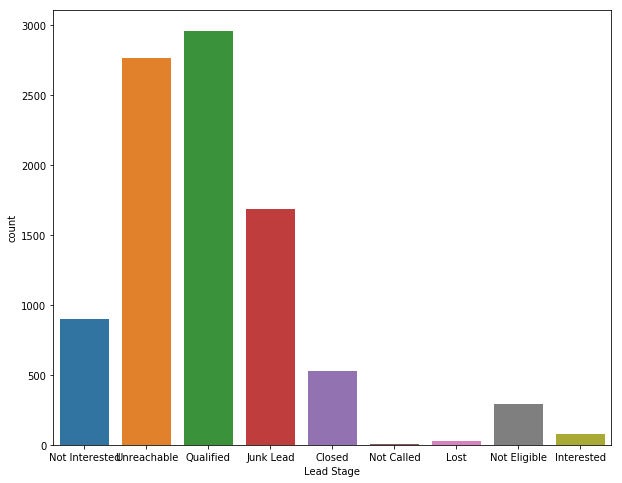

In [9]:
# Response Variable
print(data['Lead Stage'].describe())
plt.figure(figsize=(10, 8))
sns.countplot(data['Lead Stage'])

 # Numerical Data Distribution

In [10]:
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [11]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Lead Number,Lead Score,Engagement Score,TotalVisits,Page Views Per Visit,Average Time Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Scoring Model
0,660737,105,0,0.0,0.0,0.00,15.0,15.0,2.0
1,660728,120,0,5.0,2.5,83.75,15.0,15.0,2.0
2,660727,150,80,2.0,2.0,4.00,14.0,20.0,2.0
3,660719,60,0,1.0,1.0,0.00,13.0,17.0,2.0
4,660681,80,10,2.0,1.0,0.00,15.0,18.0,2.0


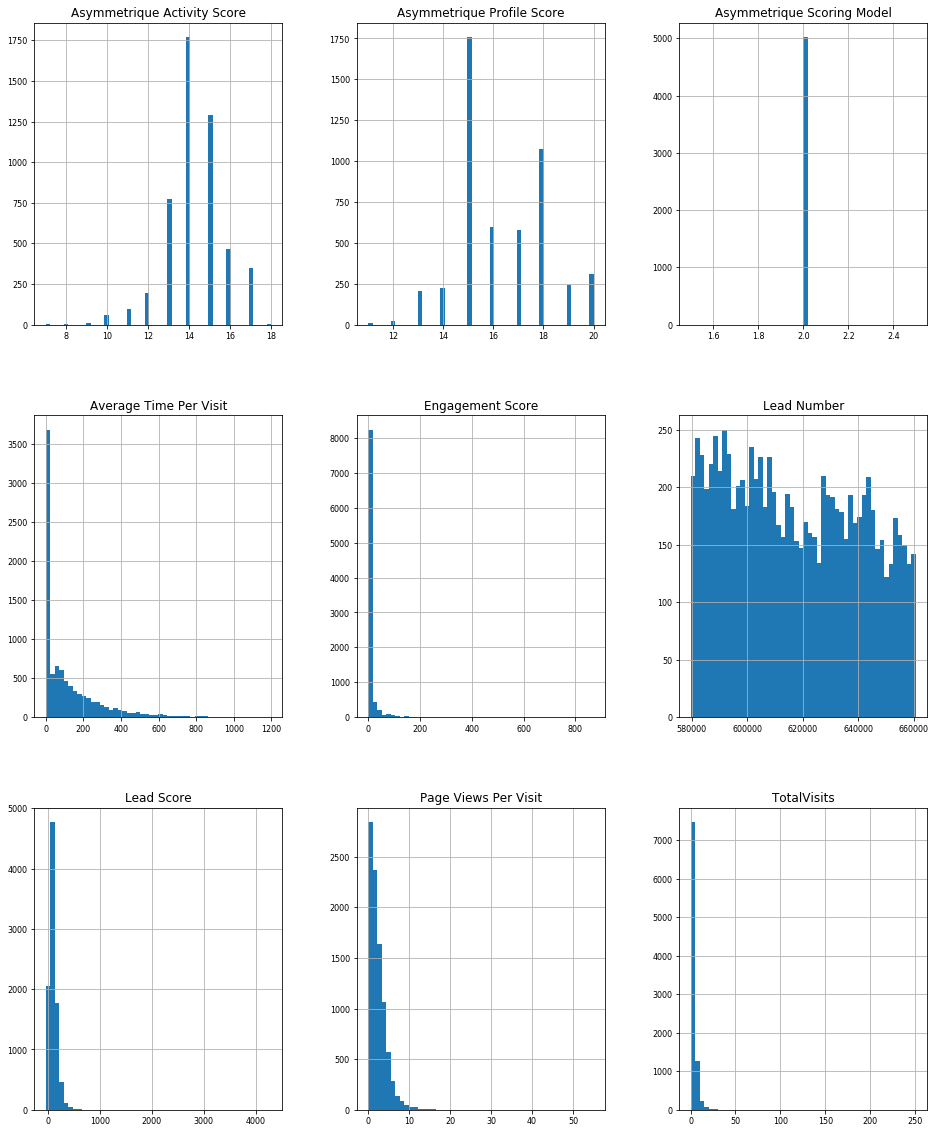

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Correlation

In [13]:
df_num_corr = df_num.corr()['Lead Score']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with SalePrice:
Lead Score     1.000000
TotalVisits    0.613757
Name: Lead Score, dtype: float64


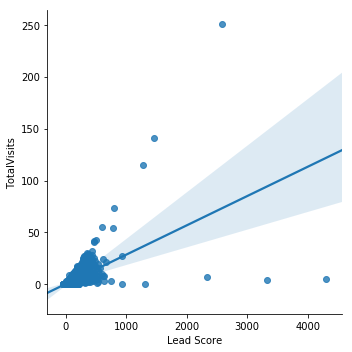

In [14]:
sns.lmplot(x='Lead Score',y='TotalVisits',data=data)

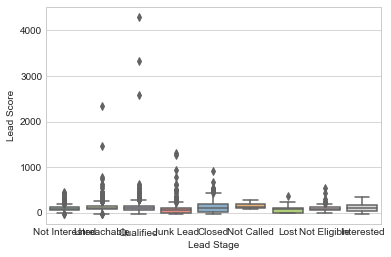

In [15]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Lead Stage", y="Lead Score",              
data=data, palette="Set3")

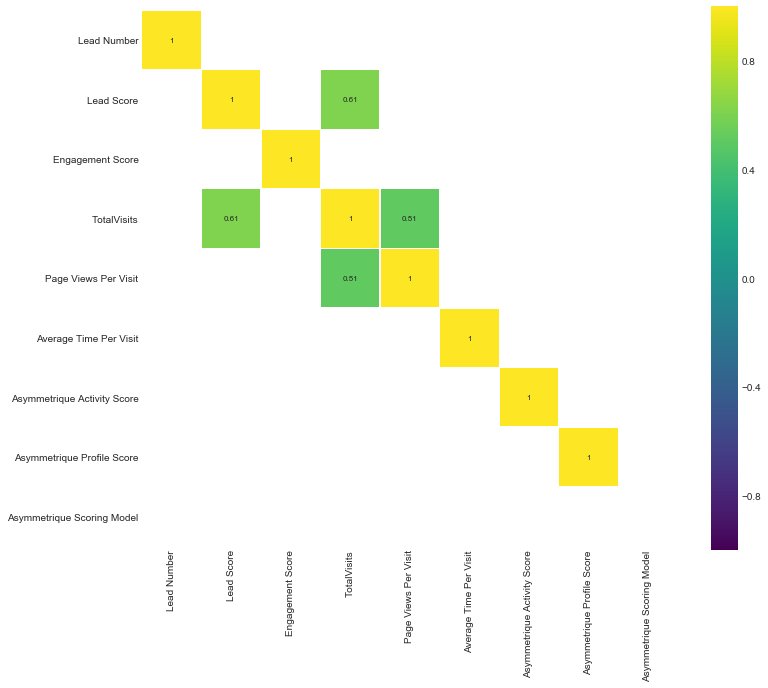

In [16]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [17]:
cat_data = data.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(cat_data.columns), cat_data.columns.tolist()))

There is 66 non numerical features including:
['Prospect ID', 'Lead Origin', 'Lead Source', 'Source Medium', 'Notes', 'Source Campaign', 'Source Content', 'Do Not Email', 'Do Not Call', 'Lead Stage', 'Lead Grade', 'Last Activity', 'Last Activity Date', 'Related Landing Page Id', 'First Landing Page Submission Id', 'First Landing Page Submission Date', 'Created On', 'Modified On', 'Lead Conversion Date', 'Cityold', 'State', 'Country', 'Specialization', 'Entrance Test', 'How did you hear about SomeSchool', 'What is your current occupation', 'If you are a working professional', 'If you are a working professional please mention ', 'What matters most to you in choosing an ADP', 'Age', 'Search', 'Magazine', 'Newspaper Article', 'Welearn Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on PGDMHBSCM', 'Chat Group', 'Lead Profile', 'City New', 'Country New

### Fixing Nulls

In [18]:
x = cat_data.isnull().sum()/cat_data.isnull().count()*100
x.sort_values(ascending=False)

Notes                                               85.075758
Lead Grade                                          81.818182
Source Content                                      69.015152
Source Medium                                       68.160173
Source Campaign                                     68.160173
Chat Group                                          66.287879
Lead Quality                                        51.590909
State                                               47.316017
Related Landing Page Id                             47.132035
First Landing Page Submission Date                  47.132035
First Landing Page Submission Id                    47.132035
Asymmetrique Profile Index                          45.649351
Asymmetrique Activity Index                         45.649351
Tags                                                36.287879
Cityold                                             32.997835
you to consider SomeSchool                          29.329004
Asym Wha

In [19]:
cat_data.replace(to_replace='Select', value=np.NaN, inplace=True)
cat_data.replace(to_replace='Select Specialization', value=np.NaN, inplace=True)

cat_data.drop('Do Not Call', axis=1, inplace=True)
cat_data.drop(['Source Campaign', 'Source Content', 'Source Medium', 'State', 'Last Activity Date', 'Cityold', 
               'Country', 'Country New', 'Entrance Test', 'If you are a working professional please mention ', 
               'What matters most to you in choosing an ADP', 
              'Age', 'Search', 'Magazine', 'Newspaper Article', 'Welearn Forums', 'Newspaper', 'Digital Advertisement', 
               'Through Recommendations', 'Receive More Updates About Our Courses'], axis=1, inplace=True)
cat_data.drop(['Prospect ID', 'Update me on Supply Chain Content','I agree to pay the amount through cheque', 'Previous Stage', 'Get updates on PGDMHBSCM', 'Chat Group', 'you to consider SomeSchool ', ], axis=1, inplace=True)


In [20]:
cat_data.drop(['Related Landing Page Id', 'First Landing Page Submission Id', 'Last Notable Activity Date', 'Lead Grade', 'First Landing Page Submission Date', 'Created On', 'Modified On', 
               'Lead Conversion Date'], axis=1, inplace=True)


In [21]:
cat_data.head(1)

,Lead Origin,Lead Source,Notes,Do Not Email,Lead Stage,Last Activity,Specialization,How did you hear about SomeSchool,What is your current occupation,If you are a working professional,Tags,Lead Quality,Lead Profile,City New,Industry New,Asymmetrique Activity Index,Asymmetrique Profile Index,Number of Followup Calls,Asym how soon you can join program,Asymm Reason to take admission,Asymm Are you aware about SomeSchool College,Asymm Are you applying for any other form of MBA,Asym What is your expectation from this course,Asym How do you feel about taking admission,Asym What stopping you from joining course,Asym What are your concerns for taking admission,Asym preferences for selecting management course,a free copy of Mastering The Interview,Last Notable Activity,Last Visit Date
0,API,Olark Chat,NaN,No,Not Interested,Page Visited on Website,NaN,NaN,Unemployed,Accounting/Finance,Interested in other courses,Low in Relevance,NaN,NaN,Consumer Durables,02.Medium,02.Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Modified,31-07-2016 17:16


In [22]:
cat_data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [23]:
def impute_notes(col):
    if pd.isnull(col):
        return 0
    else:
        return 1
cat_data['Notes'] = cat_data['Notes'].apply(impute_notes)      

In [24]:
cat_data.fillna('Not Specified', inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
cat_data = cat_data.apply(le.fit_transform)

In [27]:
cat_columns = cat_data.columns.tolist()

In [28]:
num_data = data.select_dtypes(['int64', 'float64'])

In [29]:
num_data.head()

,Lead Number,Lead Score,Engagement Score,TotalVisits,Page Views Per Visit,Average Time Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Scoring Model
0,660737,105,0,0.0,0.0,0.00,15.0,15.0,2.0
1,660728,120,0,5.0,2.5,83.75,15.0,15.0,2.0
2,660727,150,80,2.0,2.0,4.00,14.0,20.0,2.0
3,660719,60,0,1.0,1.0,0.00,13.0,17.0,2.0
4,660681,80,10,2.0,1.0,0.00,15.0,18.0,2.0


In [30]:
num_data.drop('Lead Number', axis=1, inplace=True)

In [31]:
df = pd.concat([num_data, cat_data], axis=1)
df.head()

,Lead Score,Engagement Score,TotalVisits,Page Views Per Visit,Average Time Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Scoring Model,Lead Origin,Lead Source,Notes,Do Not Email,Lead Stage,Last Activity,Specialization,How did you hear about SomeSchool,What is your current occupation,If you are a working professional,Tags,Lead Quality,Lead Profile,City New,Industry New,Asymmetrique Activity Index,Asymmetrique Profile Index,Number of Followup Calls,Asym how soon you can join program,Asymm Reason to take admission,Asymm Are you aware about SomeSchool College,Asymm Are you applying for any other form of MBA,Asym What is your expectation from this course,Asym How do you feel about taking admission,Asym What stopping you from joining course,Asym What are your concerns for taking admission,Asym preferences for selecting management course,a free copy of Mastering The Interview,Last Notable Activity,Last Visit Date
0,105,0,0.0,0.0,0.00,15.0,15.0,2.0,0,7,0,0,6,11,12,3,5,0,8,1,2,1,3,1,1,6,2,5,1,2,3,1,5,1,3,0,8,6014
1,120,0,5.0,2.5,83.75,15.0,15.0,2.0,0,8,0,0,8,5,12,3,5,0,15,3,2,1,3,1,1,6,2,5,1,2,3,1,5,1,3,0,4,1559
2,150,80,2.0,2.0,4.00,14.0,20.0,2.0,1,1,0,0,7,5,1,3,4,0,20,2,4,0,3,1,0,6,0,7,6,0,3,3,5,3,2,1,4,1154
3,60,0,1.0,1.0,0.00,13.0,17.0,2.0,1,1,1,0,8,14,11,9,5,0,15,4,2,0,3,1,0,6,2,5,1,2,3,1,5,1,3,0,8,542
4,80,10,2.0,1.0,0.00,15.0,18.0,2.0,1,3,1,0,7,1,12,5,5,0,20,2,2,0,3,1,0,6,2,5,1,2,3,1,5,1,3,0,8,175


In [32]:
df.drop('Last Visit Date', axis=1, inplace=True)

In [33]:
df['Asym preferences for selecting management course'].value_counts()

3    8360
2     583
0     199
1      98
Name: Asym preferences for selecting management course, dtype: int64

In [34]:
df['Lead Stage'].value_counts()

7    2960
8    2763
2    1686
6     899
0     525
5     293
1      76
3      29
4       9
Name: Lead Stage, dtype: int64

In [5]:
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [35]:
df['Asymmetrique Activity Score'] = df['Asymmetrique Activity Score'].fillna((df['Asymmetrique Activity Score'].mean()))
df['Asymmetrique Scoring Model'] = df['Asymmetrique Scoring Model'].fillna((df['Asymmetrique Scoring Model'].mean()))
df['Asymmetrique Profile Score'] = df['Asymmetrique Profile Score'].fillna((df['Asymmetrique Profile Score'].mean()))
df['Average Time Per Visit'] = df['Average Time Per Visit'].fillna((df['Average Time Per Visit'].mean()))
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna((df['Page Views Per Visit'].mean()))
df['TotalVisits'] = df['TotalVisits'].fillna((df['TotalVisits'].mean()))

In [36]:
X = df.drop('Lead Stage', axis=1)
y = df['Lead Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [92]:
# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
predictions = clf.predict(X_test)

In [39]:
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report

In [40]:
cm = confusion_matrix(y_test, predictions)
cm

array([[148,   0,   5,   0,   0,   2,  12,   0,   1],
       [  0,   1,   1,   0,   0,   0,   0,  16,   7],
       [  3,   0, 440,   0,   0,   1,   8,  10,  40],
       [  0,   0,   0,   1,   0,   1,   1,   1,   2],
       [  0,   0,   1,   0,   0,   1,   0,   0,   4],
       [  4,   0,   3,   0,   0,  52,  10,   1,  16],
       [  9,   0,  15,   0,   0,  11, 199,   6,  50],
       [  1,   4,   7,   2,   0,   0,   3, 839,  41],
       [  0,   1,  32,   0,   0,   4,  16,  46, 693]], dtype=int64)

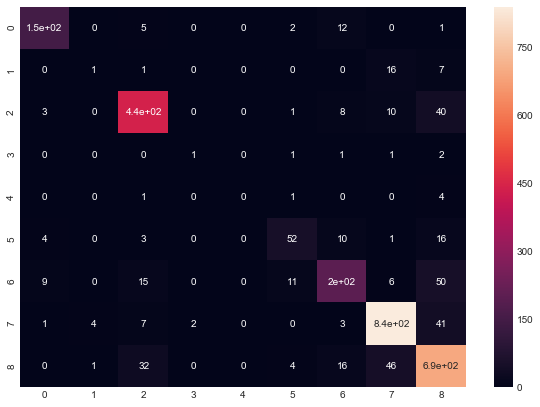

In [41]:
df_cm = pd.DataFrame(cm, index = range(9),
                  columns = range(9))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       168
           1       0.17      0.04      0.06        25
           2       0.87      0.88      0.87       502
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         6
           5       0.72      0.60      0.66        86
           6       0.80      0.69      0.74       290
           7       0.91      0.94      0.92       897
           8       0.81      0.88      0.84       792

   micro avg       0.86      0.86      0.86      2772
   macro avg       0.61      0.56      0.58      2772
weighted avg       0.85      0.86      0.85      2772



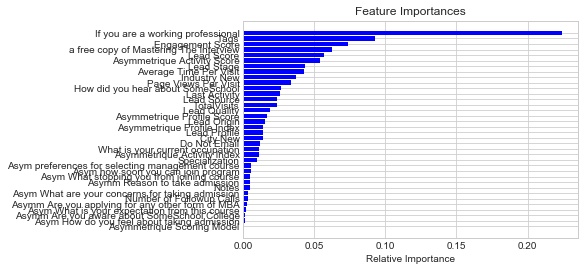

In [47]:
features = df.columns.tolist()
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.figure(figsize=(23,18))
plt.show()